## Heart Failure EDA and Prediction

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression] (ST depression induced by exercise relative to rest)

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]


In [88]:
df = pd.read_csv("Data\heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Dataset Information 

In [89]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    int64  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
 12  sexEncoded      917 non-null    uint8  
dtypes: float64(1), int64(6), object(5), uint8(1)
memory usage: 126.3+ KB


In [90]:
df['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [91]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [92]:
df.loc[df.isnull().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [93]:
df.loc[df.isna().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [94]:
df.loc[df.duplicated(keep=False)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [243]:
# sns.pairplot(data=df, vars=['Age', 'RestingBP', 'Cholesterol', 'HeartDisease'], hue='Sex', palette='afmhot')

In [96]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


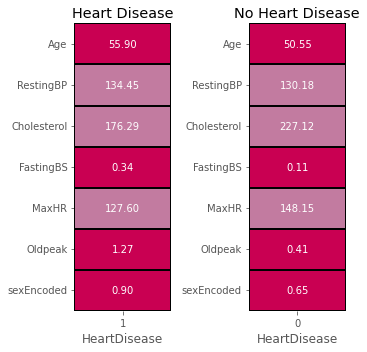

In [266]:
heartDiseaseY = df.groupby('HeartDisease').mean().loc[[1]].T
heartDiseaseN = df.groupby('HeartDisease').mean().loc[[0]].T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
cmap = ['#c90052', '#c27ba0']


plt.subplot(1,2,1)
sns.heatmap(heartDiseaseY, annot = True, linewidths = 0.4, linecolor = 'black', cbar = False, fmt = '.2f', cmap=cmap)
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(heartDiseaseN,annot = True, linewidths = 0.4,linecolor = 'black', cbar = False, fmt = '.2f', cmap=cmap)
plt.title('No Heart Disease')

plt.tight_layout()


# EDA

## Checking distribution of Data

#### Numeric

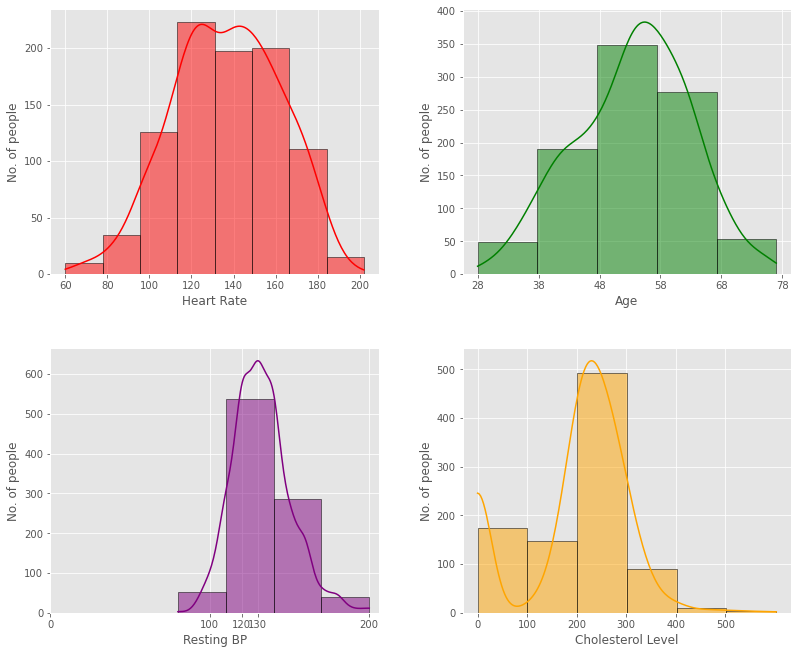

In [288]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

plt.subplot(2,2,1)
sns.histplot(df['MaxHR'], bins=8, color='red', edgecolor='k', kde=True)
ax[0, 0].set_xlabel('Heart Rate')
ax[0, 0].set_ylabel('No. of people')

plt.subplot(2,2,2)
sns.histplot(df['Age'], bins=5, color='green', edgecolor='k', kde=True)
ax[0, 1].set_xlabel('Age')
ax[0, 1].set_ylabel('No. of people')
ax[0, 1].set_xticks(np.arange(28, 79, 10))

plt.subplot(2,2,3)
sns.histplot(df['RestingBP'], bins=4, color='purple', edgecolor='k', kde=True)
ax[1, 0].set_xlabel('Resting BP')
ax[1, 0].set_ylabel('No. of people')
ax[1, 0].set_xticks([0, 100, 120, 130, 200])

plt.subplot(2,2,4)
sns.histplot(df['Cholesterol'], bins=6, color='orange', edgecolor='k', kde=True)
ax[1, 1].set_xlabel('Cholesterol Level')
ax[1, 1].set_ylabel('No. of people')
ax[1, 1].set_xticks(np.arange(0, 600, 100))

plt.tight_layout(pad=4)
plt.show()

Everything has a fairly normal distribution, except cholesterol, which has a bimodal distribution.

<AxesSubplot:>

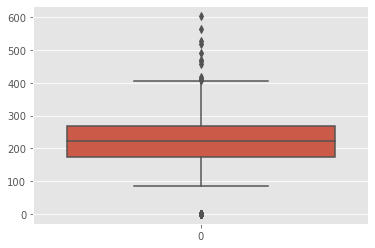

In [296]:
sns.boxplot(data=df['Cholesterol'])

#### This boxplot indicates that there are some outliers in the cholesterol attribute. I could not find anywhere if a cholesterol level of 0 is not really possible. Furthermore, serum cholesterol os usually measured with mg/dl and not mm/dl as the dataset source mentions. 

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

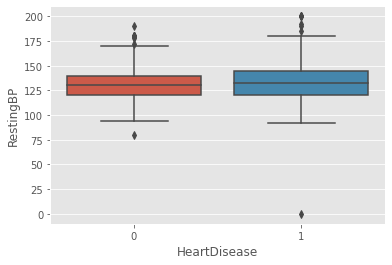

In [98]:
# sns.scatterplot(x=df['RestingBP'], y=df['RestingBP'],hue=df['HeartDisease'])
sns.boxplot(y=df['RestingBP'], x=df['HeartDisease'])

In [330]:
df['HeartDisease']

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 917, dtype: int64

In [344]:
df['h']

0       No
1      Yes
2       No
3      Yes
4       No
      ... 
913    Yes
914    Yes
915    Yes
916    Yes
917     No
Name: h, Length: 917, dtype: object

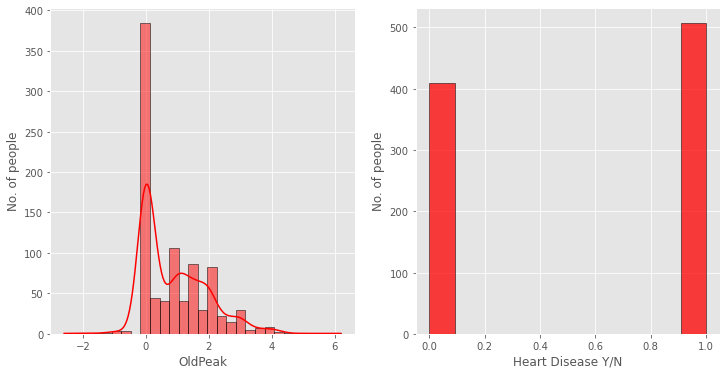

In [363]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

plt.subplot(1,2,1)
sns.histplot(df['Oldpeak'], color='red', edgecolor='k', kde=True)
ax[0].set_xlabel('OldPeak')
ax[0].set_ylabel('No. of people')


plt.subplot(1,2,2)
sns.histplot(df['HeartDisease'], color='red', edgecolor='k')
ax[1].set_xlabel('Heart Disease Y/N')
ax[1].set_ylabel('No. of people')

plt.show()

### Old peak is right skewed. This dataset has a fairly equally distributed observations when looking at the target variable. Most of the people belong to the 30-60 age range. Majority of those have a resting BP between 100-150.

## Looks like there is one observation with BP as 0. Deleting that row.

In [99]:
df = df.loc[df['RestingBP'] > 0]

In [100]:
df['sexEncoded'] = pd.get_dummies(df['Sex'], drop_first=True)

C:\Users\rohit\AppData\Local\Temp/ipykernel_8892/4056814884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sexEncoded'] = pd.get_dummies(df['Sex'], drop_first=True)


## Numeric vs Categorical data (with respect to HeartDisease )

<AxesSubplot:xlabel='Sex', ylabel='Age'>

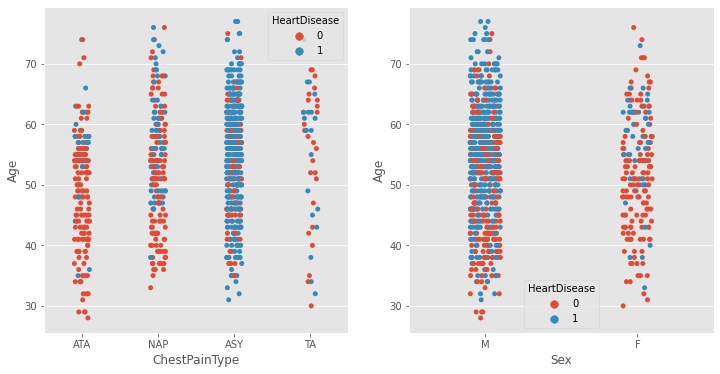

In [401]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.stripplot(x=df['ChestPainType'], y=df['Age'], hue=df['HeartDisease'])

plt.subplot(1, 2, 2)
sns.stripplot(x=df['Sex'], y=df['Age'], hue=df['HeartDisease'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

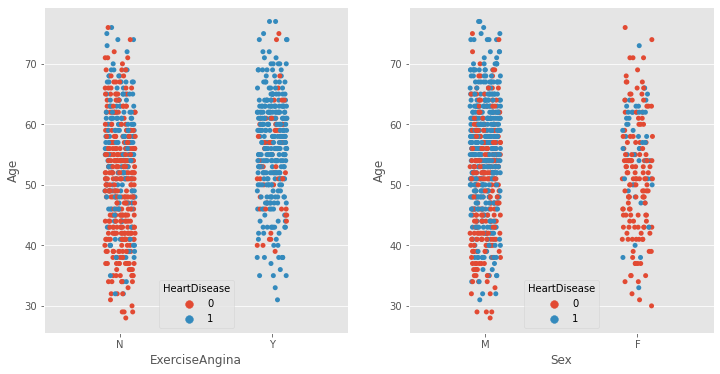

In [403]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.stripplot(x=df['ExerciseAngina'], y=df['Age'], hue=df['HeartDisease'])

plt.subplot(1, 2, 2)
sns.stripplot(x=df['Sex'], y=df['Age'], hue=df['HeartDisease'])

In [404]:
df['EA'] = df['ExerciseAngina'].replace({'N': 0, 'Y':1})
df['EA']

C:\Users\rohit\AppData\Local\Temp/ipykernel_8892/3863799361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EA'] = df['ExerciseAngina'].replace({'N': 0, 'Y':1})


0      0
1      0
2      0
3      1
4      0
      ..
913    0
914    0
915    1
916    0
917    0
Name: EA, Length: 917, dtype: int64

### Correlation

<AxesSubplot:>

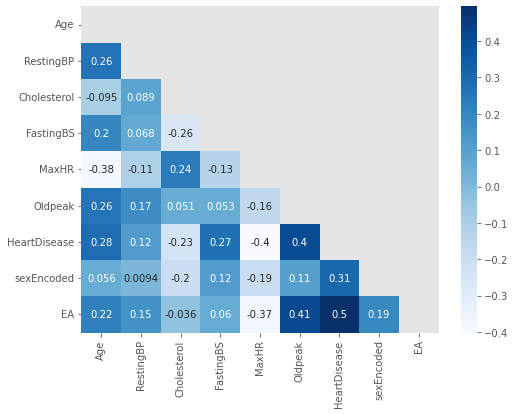

In [406]:
import numpy as np

plt.figure(figsize=(8, 6))

corr = df.corr()
matrix = np.triu(corr)

sns.heatmap(corr, cmap="Blues", annot=True, mask=matrix)

#### Old peak has the highest correlation value.

#### Update: Just added encoded version of exercise angina. It has a much higher impact than I thought. Creating one more heatmap with all categorical values (Chart redrawn below).

<AxesSubplot:xlabel='HeartDisease', ylabel='Oldpeak'>

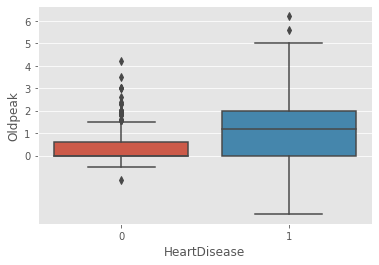

In [102]:
plt.yticks([0,1,2,3,4,5,6])

sns.boxplot(y=df['Oldpeak'], x=df['HeartDisease'])

This chart indicates that those with higher Oldpeak values are more likely to be diagnosed with heart disease

In [103]:
df.groupby('sexEncoded').count()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
sexEncoded,,,,,,,,,,,,
0,193,193,193,193,193,193,193,193,193,193,193,193
1,724,724,724,724,724,724,724,724,724,724,724,724


In [104]:
df.groupby('Sex').agg({"HeartDisease": "sum"})

,HeartDisease
Sex,
F,50
M,457


### Observations are not very balanced in terms of gender

In [105]:
group1 = df.groupby('Sex').count()
group1.head()

sex = [group for group, df1 in df.groupby('Sex')]

heart_m = df.loc[df['Sex'] == 'M']
heart_f = df.loc[df['Sex'] == 'F']

# y1 = heart_t.groupby('Sex').count()['Age']
# y2 = heart_f.groupby('Sex').count()['Age']

In [106]:
heart_m = heart_m.loc[df['HeartDisease'] == 1, 'Age'].count()
heart_f = heart_f.loc[df['HeartDisease'] == 1, 'Age'].count()

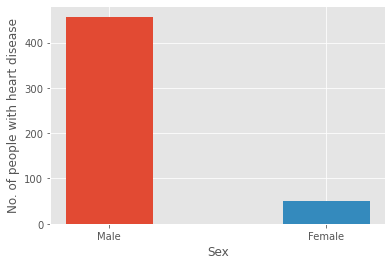

In [107]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# ax[0,0].hist(df['Age'], bins=5, color='green', edgecolor='k')
# ax[0,0].set_xlabel('Age')
# ax[0,0].set_ylabel('No. of people')
# ax[0,0].set_xticks(np.arange(28, 79, 10))

ax.bar('Male', heart_m, width=0.4)
ax.bar('Female', heart_f, width=0.4)
ax.set_xlabel('Sex')
ax.set_ylabel('No. of people with heart disease')

# ax[1,0].hist(df['RestingBP'], bins=4, color='purple', edgecolor='k')
# ax[1,0].set_xlabel('Resting BP')
# ax[1,0].set_ylabel('No. of people')
# ax[1,0].set_xticks(np.arange(0, 200, 50))

# ax[1,1].hist(df['Cholesterol'], bins=6, color='orange', edgecolor='k')
# ax[1,1].set_xlabel('Cholesterol Level')
# ax[1,1].set_ylabel('No. of people')
# ax[1,1].set_xticks(np.arange(0, 600, 100))

# plt.tight_layout(pad=2)
plt.show()

Majority of the people in the dataset are in males aging from 48-68 

In [108]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,sexEncoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,1
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0,0


In [109]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,sexEncoded
Age,1.000000,0.263084,-0.095142,0.198170,-0.382280,0.258563,0.282012,0.055670
RestingBP,0.263084,1.000000,0.089392,0.067823,-0.109693,0.174252,0.117990,0.009427
Cholesterol,-0.095142,0.089392,1.000000,-0.262585,0.237705,0.051390,-0.231479,-0.199458
FastingBS,0.198170,0.067823,-0.262585,1.000000,-0.131067,0.053062,0.267994,0.120424
MaxHR,-0.382280,-0.109693,0.237705,-0.131067,1.000000,-0.161213,-0.401410,-0.189668
Oldpeak,0.258563,0.174252,0.051390,0.053062,-0.161213,1.000000,0.403638,0.105444
HeartDisease,0.282012,0.117990,-0.231479,0.267994,-0.401410,0.403638,1.000000,0.305118
sexEncoded,0.055670,0.009427,-0.199458,0.120424,-0.189668,0.105444,0.305118,1.000000


In [110]:
df.loc[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,sexEncoded
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0,1
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1,1


#### Encoding for building model

In [ ]:
from sklearn import preprocessing

ml_df = df.copy()


def labelenc(col):
    encoder = preprocessing.LabelEncoder() 
    ml_df[col] = encoder.fit_transform(ml_df[col])

In [223]:
# labelenc('Sex')
labelenc('ChestPainType')
labelenc('RestingECG')
labelenc('ExerciseAngina')
labelenc('ST_Slope')
ml_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,sexEncoded
0,40,M,1,140,289,0,1,172,0,0.0,2,0,1
1,49,F,2,160,180,0,1,156,0,1.0,1,1,0
2,37,M,1,130,283,0,2,98,0,0.0,2,0,1
3,48,F,0,138,214,0,1,108,1,1.5,1,1,0
4,54,M,2,150,195,0,1,122,0,0.0,2,0,1


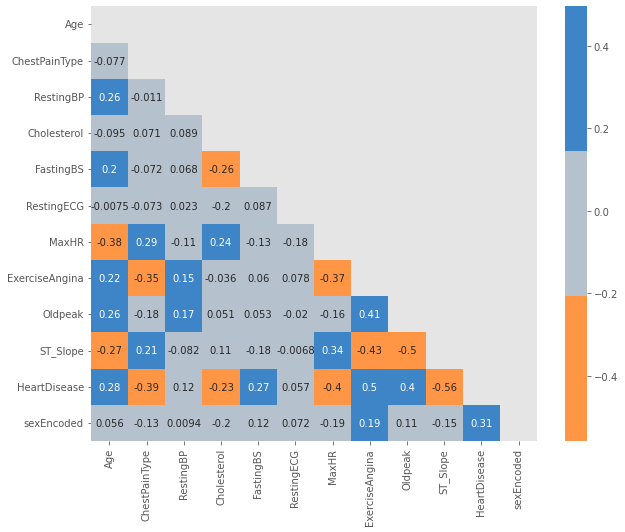

In [416]:
import numpy as np

plt.figure(figsize=(10, 8))

corr = ml_df.corr()
matrix = np.triu(corr)

sns.heatmap(corr, cmap=['#FF9646', '#b5c1cc', '#3d85c6'], annot=True, mask=matrix)
plt.show()

## Lesson learned: Create correlation chart after encoding categorical values.

# Model Creation

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [225]:
X = ml_df.drop(columns=['HeartDisease', 'Sex'], axis=1).values
X_scaled = preprocessing.scale(X)
y = ml_df['HeartDisease'].values

In [451]:
ml_df.drop(columns=['HeartDisease', 'Sex'])

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,sexEncoded
0,40,1,140,289,0,1,172,0,0.0,2,1
1,49,2,160,180,0,1,156,0,1.0,1,0
2,37,1,130,283,0,2,98,0,0.0,2,1
3,48,0,138,214,0,1,108,1,1.5,1,0
4,54,2,150,195,0,1,122,0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,3,110,264,0,1,132,0,1.2,1,1
914,68,0,144,193,1,1,141,0,3.4,1,1
915,57,0,130,131,0,1,115,1,1.2,1,1
916,57,1,130,236,0,0,174,0,0.0,1,0


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

In [227]:
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
print(f'DecisionTreeClassifier Score: {clf1.score(X_test, y_test)}')

DecisionTreeClassifier Score: 0.7615803814713896


In [418]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
print(f'RandomForestClassifier Score: {clf2.score(X_test, y_test)}')

RandomForestClassifier Score: 0.8514986376021798


In [419]:
clf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [420]:
print(f'DecisionTreeClassifier Score: {clf1.score(X_train, y_train)}')

DecisionTreeClassifier Score: 1.0


In [421]:
print(f'RandomForestClassifier Score: {clf2.score(X_train, y_train)}')

RandomForestClassifier Score: 1.0


In [422]:
predicted = clf2.predict(X_test)

In [235]:
from sklearn.metrics import precision_score


precision_score(y_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

0.8609756097560975

In [236]:
from sklearn.metrics import recall_score

recall_score(y_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')


0.863080684596577

### Choosing random forest classifier as the model to go. It has an accuracy of 86% when predicting, and has a good precision and recall as well. 

But, both models are overfitting. Perfect scores on training data, so modifying parameters.

In [435]:
clf2 = RandomForestClassifier(max_depth=3)
clf2.fit(X_train, y_train)
print(f'RandomForestClassifier Score: {clf2.score(X_train, y_train)}')

RandomForestClassifier Score: 0.8743169398907104


In [436]:
predicted = clf2.predict(X_test)

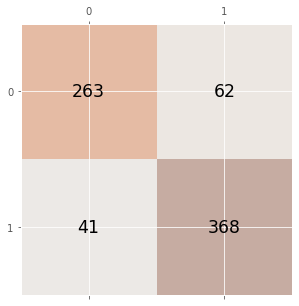

In [437]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predicted, labels=None, sample_weight=None, normalize=None)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

In [439]:
recall_score(y_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

0.8997555012224939

In [417]:
print(f'RandomForestClassifier Score: {clf2.score(X_test, y_test)}')

RandomForestClassifier Score: 0.8555858310626703


C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


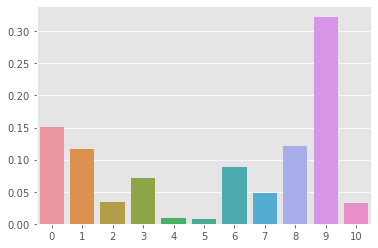

In [449]:
importance = clf2.feature_importances_

sns.barplot([x for x in range(len(importance))], importance)
plt.show()

## Have now achieved lower accuracy for training data, and higher recall score for test data, indicating that the model is not overfitting like before 

Since the accuracy remains almost the same for test data, this should make for a more robust model.